In [1]:
setwd("/content/")

In [2]:
install.packages("FactoMineR")
install.packages("factoextra")
install.packages("devtools")
devtools::install_github("kassambara/factoextra")
library("FactoMineR")
library("factoextra")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)





── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpkGVk2u/remotes48bc230e0ec8/kassambara-factoextra-1689fc7/DESCRIPTION’ ... OK
* preparing ‘factoextra’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘factoextra_1.0.7.999.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



In [4]:
# Install and load required package
install.packages("googledrive")
library(googledrive)

# Mount Google Drive
drive_auth()

# Specify the file name and download it to the working directory
file_name <- "ds_salaries.csv"
drive_download(file_name, path = file_name, overwrite = TRUE)

# Read the CSV file
df <- read.csv(file_name)

# View the first few rows
head(df)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

The googledrive package is requesting access to your Google account.
Enter '1' to start a new auth process or select a pre-authorized account.
1: Send me to the browser for a new auth process.
2: 2020s17900@stu.cmb.ac.lk


Selection: 1


Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=https%3A%2F%2Fwww.tidyverse.org%2Fgoogle-callback%2F&response_type=code&state=6d0e013aaa136f4a41c4e3072f9c0893&access_type=offline&prompt=consent



Enter authorization code: eyJjb2RlIjoiNC8wQVZHN2ZpUnRhMW9KdzVlelpOQTA3Y0VReHVlLUhvbFcyQk15WEJrbkpEeVM0dGpqZ29TOUwyc1o4bG5aWVhnU3VfV09wZyIsInN0YXRlIjoiNmQwZTAxM2FhYTEzNmY0YTQxYzRlMzA3MmY5YzA4OTMifQ==


File downloaded:

• ds_salaries.csv <id: 1YZKkm5GtVq4ubI1YuGfRt_u4OFJRmF_Q>

Saved locally as:

• ds_salaries.csv



,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>
1,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
2,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
3,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
4,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
5,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
6,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L


In [5]:
df <- read.csv('ds_salaries.csv')
head(df)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>
1,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
2,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
3,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
4,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
5,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
6,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L


In [6]:
numerical_features <- c('work_year', 'salary', 'salary_in_usd', 'remote_ratio')
categorical_features <- c('experience_level', 'employment_type', 'job_title', 'salary_currency','employee_residence', 'company_location', 'company_size')

# Print the lists
print("Numerical features:")
print(numerical_features)

print('--------------------------------------------------------------------------------------------')

print("Categorical features:")
print(categorical_features)

[1] "Numerical features:"
[1] "experience_level"   "employment_type"    "job_title"         
[4] "salary_currency"    "employee_residence" "company_location"  
[7] "company_size"      
[1] "--------------------------------------------------------------------------------------------"
[1] "Categorical features:"
[1] "work_year"     "salary"        "salary_in_usd" "remote_ratio" 


In [7]:
column_names <- colnames(df)
print(column_names)

 [1] "work_year"          "experience_level"   "employment_type"   
 [4] "job_title"          "salary"             "salary_currency"   
 [7] "salary_in_usd"      "employee_residence" "remote_ratio"      
[10] "company_location"   "company_size"      


In [8]:
install.packages("dplyr")
library(dplyr)

# Remove duplicates
df <- df %>% distinct()


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [9]:
# Count the number of duplicate rows
num_duplicates <- sum(duplicated(df))
num_duplicates


[1] 0

In [10]:
categorical_features

[1] "work_year"     "salary"        "salary_in_usd" "remote_ratio"

In [11]:
df[categorical_features] <- lapply(df[categorical_features], factor)
str(df)

'data.frame':	2584 obs. of  11 variables:
 $ work_year         : Factor w/ 4 levels "2020","2021",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ experience_level  : chr  "SE" "MI" "MI" "SE" ...
 $ employment_type   : chr  "FT" "CT" "CT" "FT" ...
 $ job_title         : chr  "Principal Data Scientist" "ML Engineer" "ML Engineer" "Data Scientist" ...
 $ salary            : Factor w/ 815 levels "6000","7000",..: 128 29 24 494 267 646 338 638 366 394 ...
 $ salary_currency   : chr  "EUR" "USD" "USD" "USD" ...
 $ salary_in_usd     : Factor w/ 1035 levels "5132","5409",..: 343 90 76 758 510 915 592 907 620 650 ...
 $ employee_residence: chr  "ES" "US" "US" "CA" ...
 $ remote_ratio      : Factor w/ 3 levels "0","50","100": 3 3 3 3 3 1 1 1 1 1 ...
 $ company_location  : chr  "ES" "US" "US" "CA" ...
 $ company_size      : chr  "L" "S" "S" "M" ...


In [27]:
# Convert continuous variables to numeric and categorical to factor
df$salary <- as.numeric(df$salary)
df$salary_in_usd <- as.numeric(df$salary_in_usd)
df$work_year <- as.numeric(df$work_year)
df$experience_level <- as.factor(df$experience_level)
df$job_title <- as.factor(df$job_title)
df$salary_currency <- as.factor(df$salary_currency)
df$employee_residence <- as.factor(df$employee_residence)
df$company_location <- as.factor(df$company_location)
df$company_size <- as.factor(df$company_size)
df$employment_type <- as.factor(df$employment_type)

In [28]:
str(df)

'data.frame':	2584 obs. of  11 variables:
 $ work_year         : num  4 4 4 4 4 4 4 4 4 4 ...
 $ experience_level  : Factor w/ 4 levels "EN","EX","MI",..: 4 3 3 4 4 4 4 4 4 4 ...
 $ employment_type   : Factor w/ 4 levels "CT","FL","FT",..: 3 1 1 3 3 3 3 3 3 3 ...
 $ job_title         : Factor w/ 93 levels "3D Computer Vision Researcher",..: 85 78 78 48 48 9 9 48 48 48 ...
 $ salary            : num  128 29 24 494 267 646 338 638 366 394 ...
 $ salary_currency   : Factor w/ 20 levels "AUD","BRL","CAD",..: 8 20 20 20 20 20 20 20 20 20 ...
 $ salary_in_usd     : num  343 90 76 758 510 915 592 907 620 650 ...
 $ employee_residence: Factor w/ 78 levels "AE","AM","AR",..: 27 76 76 12 12 76 76 12 12 76 ...
 $ remote_ratio      : Factor w/ 3 levels "0","50","100": 3 3 3 3 3 1 1 1 1 1 ...
 $ company_location  : Factor w/ 72 levels "AE","AL","AM",..: 26 71 71 13 13 71 71 13 13 71 ...
 $ company_size      : Factor w/ 3 levels "L","M","S": 1 3 3 2 2 1 1 2 2 2 ...


In [29]:
famd <-FAMD(df,graph=FALSE)

In [30]:
famd

*The results are available in the following objects:

  name          description                             
1 "$eig"        "eigenvalues and inertia"               
2 "$var"        "Results for the variables"             
3 "$ind"        "results for the individuals"           
4 "$quali.var"  "Results for the qualitative variables" 
5 "$quanti.var" "Results for the quantitative variables"

In [31]:
eig.val <- get_eigenvalue(famd)
head(eig.val)

,eigenvalue,variance.percent,cumulative.variance.percent
Dim.1,4.622600,1.699485,1.699485
Dim.2,3.406208,1.252283,2.951768
Dim.3,3.197334,1.175490,4.127258
Dim.4,3.132049,1.151489,5.278747
Dim.5,3.013878,1.108043,6.386790


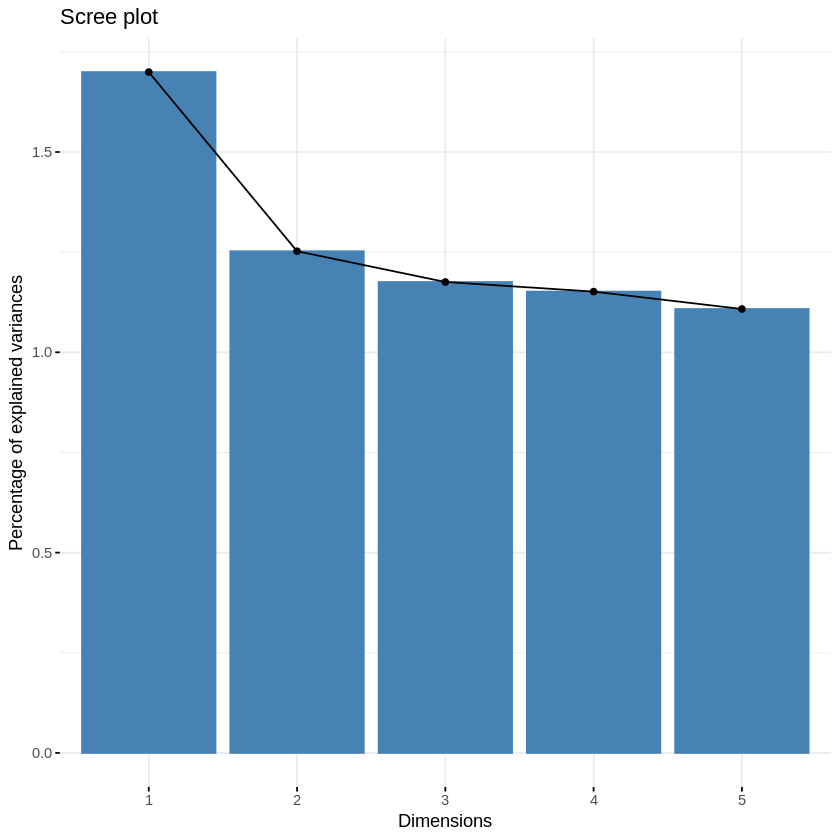

In [32]:
fviz_screeplot(famd)

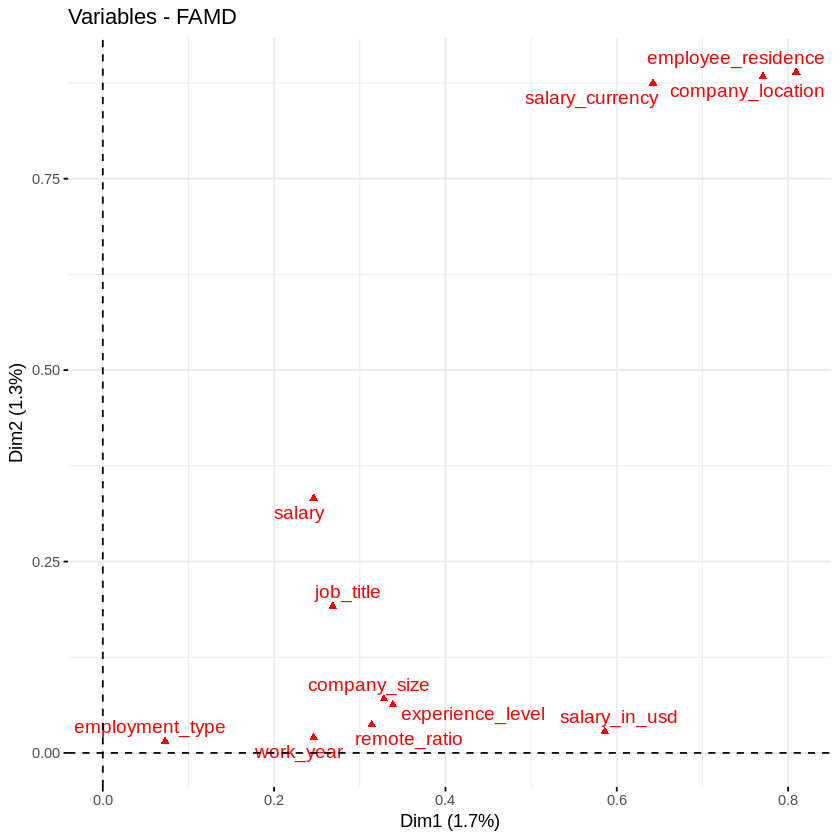

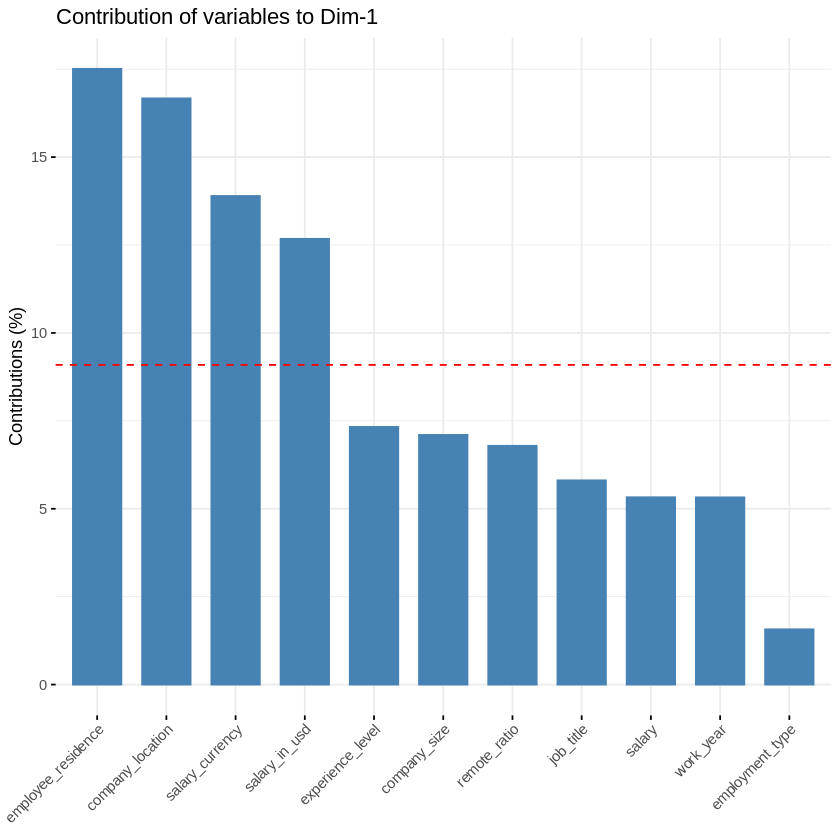

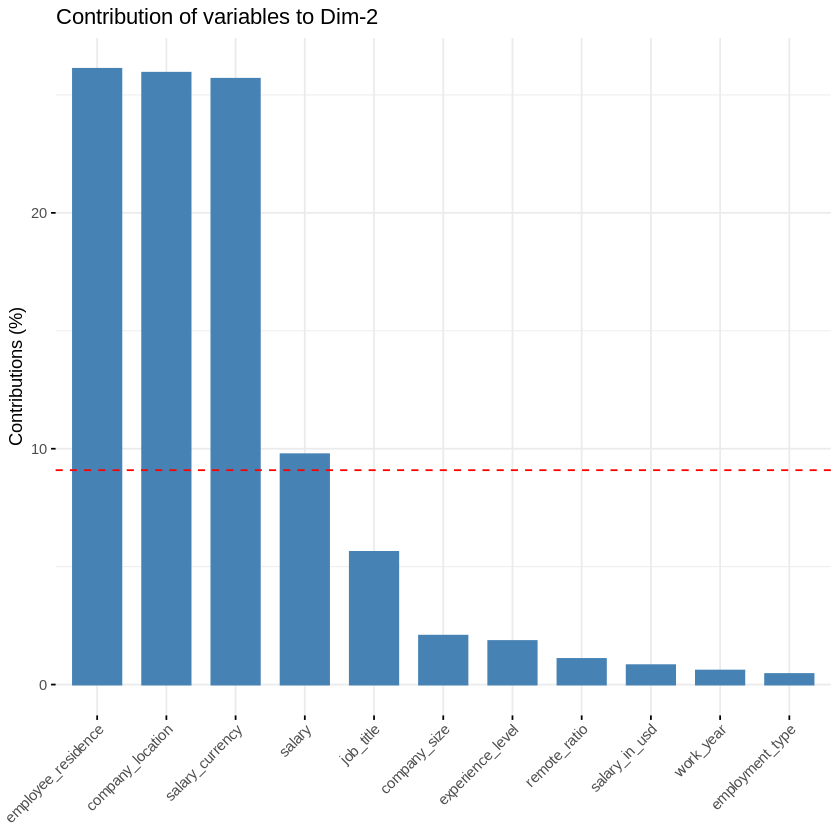

In [33]:
# Plot of variables
fviz_famd_var(famd, repel = TRUE)
# Contribution to the first dimension
fviz_contrib(famd, "var", axes = 1)
# Contribution to the second dimension
fviz_contrib(famd, "var", axes = 2)

In [34]:
summary(famd)


Call:
FAMD(base = df, graph = FALSE) 


Eigenvalues
                     Dim.1 Dim.2 Dim.3 Dim.4 Dim.5
Variance             4.623 3.406 3.197 3.132 3.014
% of var.            1.699 1.252 1.175 1.151 1.108
Cumulative % of var. 1.699 2.952 4.127 5.279 6.387

Individuals (the 10 first)
                                  Dist    Dim.1    ctr   cos2    Dim.2    ctr
1                             | 21.336 |  2.959  0.073  0.019 | -1.490  0.025
2                             | 18.970 |  1.401  0.016  0.005 | -0.156  0.000
3                             | 18.977 |  1.425  0.017  0.006 | -0.168  0.000
4                             |  8.312 | -0.996  0.008  0.014 |  0.549  0.003
5                             |  8.257 | -0.425  0.002  0.003 |  0.139  0.000
6                             |  9.751 | -1.927  0.031  0.039 |  1.135  0.015
7                             |  9.558 | -1.171  0.011  0.015 |  0.585  0.004
8                             |  8.464 | -1.500  0.019  0.031 |  0.673  0.005
9            

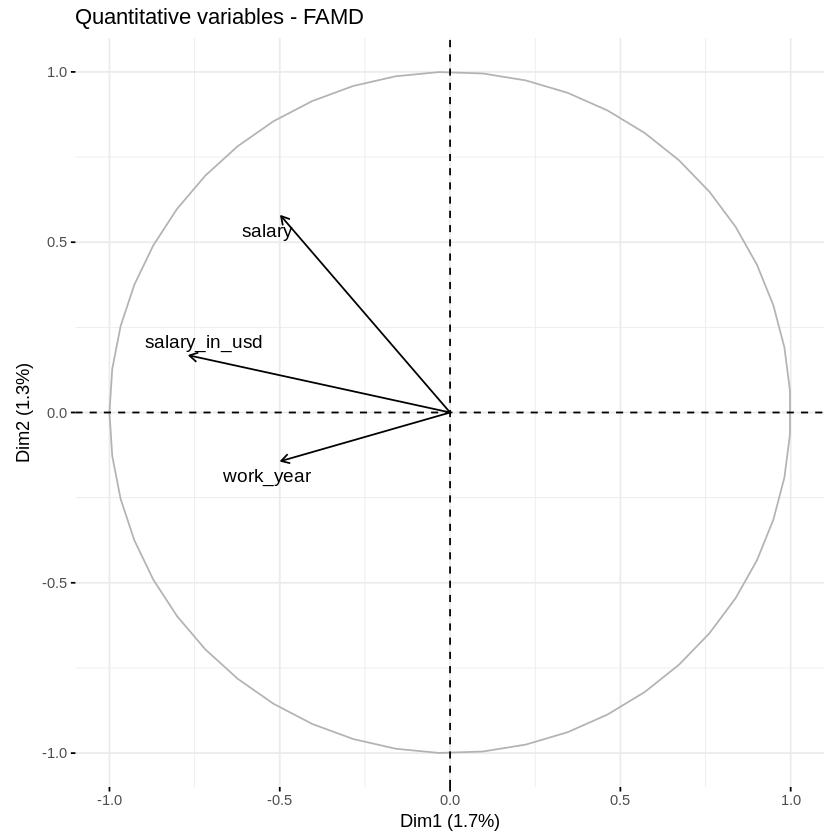

In [35]:
fviz_famd_var(famd, choice = "quanti.var", repel = TRUE, col.var = "black")

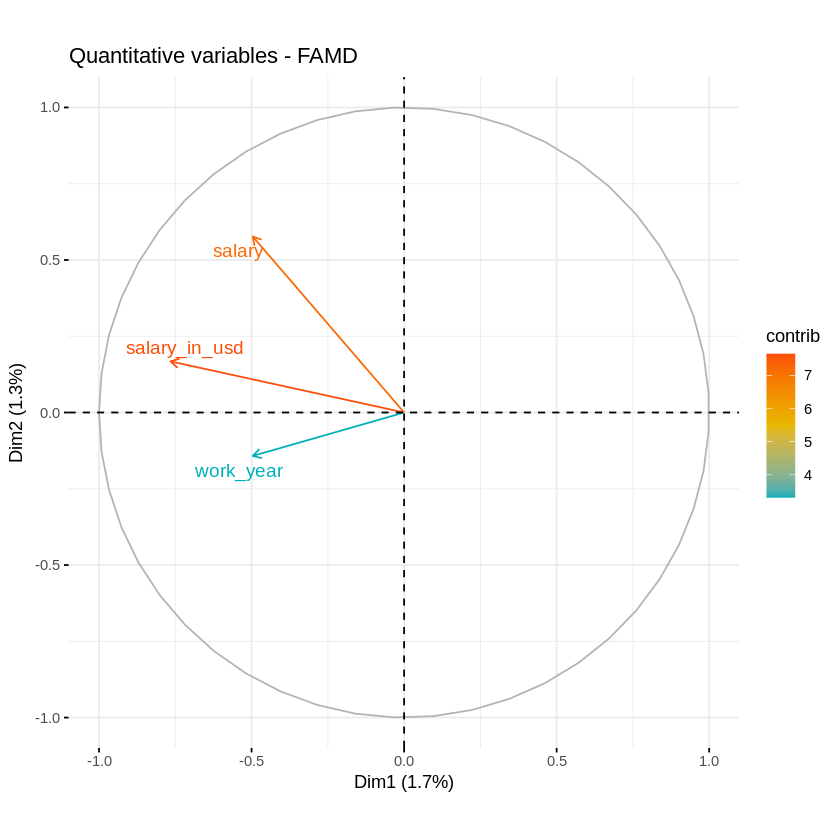

In [38]:
# Load necessary libraries
library(FactoMineR)
library(factoextra)


fviz_famd_var(
  famd,
  choice = "quanti.var",
  col.var = "contrib",
  gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
  repel = TRUE
)
